#Librerias

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#Obtención de S&P100

In [ ]:
#Obtener la lista de compañías del SP100 (ticker, nombre, sector)
sp_100 = pd.read_html('https://en.wikipedia.org/wiki/S%26P_100')[2]
sp_100

,Symbol,Name,Sector
0,AAPL,Apple Inc.,Information Technology
1,ABBV,AbbVie,Health Care
2,ABT,Abbott Laboratories,Health Care
3,ACN,Accenture,Information Technology
4,ADBE,Adobe Inc.,Information Technology
...,...,...,...
96,V,Visa Inc.,Financials
97,VZ,Verizon,Communication Services
98,WFC,Wells Fargo,Financials
99,WMT,Walmart,Consumer Staples


Eliminamos a BRK-B pues ya no forma parte del S&P100

In [ ]:
#Obtener los Ticker de las acciones
symbols = ['AAPL', 'ABBV', 'ABT', 'ACN', 'ADBE', 'AIG', 'AMD', 'AMGN', 'AMT', 'AMZN', 'AVGO', 'AXP', 'BA', 'BAC', 'BK', 'BKNG', 'BLK', 'BMY', 'BRK-B','C', 'CAT', 'CHTR', 'CL', 'CMCSA', 'COF', 'COP', 'COST', 'CRM', 'CSCO', 'CVS', 'CVX', 'DE', 'DHR', 'DIS', 'DUK', 'EMR', 'FDX', 'GD', 'GE', 'GILD', 'GM', 'GOOG', 'GOOGL', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'INTU', 'ISRG', 'JNJ', 'JPM', 'KO', 'LIN', 'LLY', 'LMT', 'LOW', 'MA', 'MCD', 'MDLZ', 'MDT', 'MET', 'META', 'MMM', 'MO', 'MRK', 'MS', 'MSFT', 'NEE', 'NFLX', 'NKE', 'NOW', 'NVDA', 'ORCL', 'PEP', 'PFE', 'PG', 'PLTR', 'PM', 'PYPL', 'QCOM', 'RTX', 'SBUX', 'SCHW', 'SO', 'SPG', 'T', 'TGT', 'TMO', 'TMUS', 'TSLA', 'TXN', 'UNH', 'UNP', 'UPS', 'USB', 'V', 'VZ', 'WFC', 'WMT', 'XOM']
symbols.remove('BRK-B')
len(symbols)

101

In [ ]:
stocks = yf.Tickers(symbols)
#Obtener las series de tiempo de los Tickers (2023-2024)
stocks2023 = stocks.history(start='2023-01-01',end='2023-12-31',auto_adjust=False)
#Obtener las series de tiempo de los Tickers (2024-2025)
stocks2024 = stocks.history(start='2024-01-01',end='2024-12-31',auto_adjust=False)

[*********************100%***********************]  101 of 101 completed
[*********************100%***********************]  101 of 101 completed


In [ ]:
#Eliminar las columnas de Dividends y Stock Splits
columns_to_drop = ['Dividends', 'Stock Splits']
stocks2023 = stocks2023.drop(columns=columns_to_drop, level=0)
stocks2024 = stocks2024.drop(columns=columns_to_drop, level=0)
print(stocks2023.columns.get_level_values(0).unique())
print(stocks2024.columns.get_level_values(0).unique())

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


Poner como índice de mayor jerarquía a los Tickers y ubriremos los datos faltantes con el dato del dia anterior usando `ffill`. Repetimos el procesos con los datos del 2024

In [ ]:
stocks2023.columns = stocks2023.columns.swaplevel(0, 1)

#Ordena las columnas por orden alfabetico del Ticker
stocks2023.sort_index(axis=1, level=0, inplace=True)

#Reordenar las columnas de precios y volumen
tickers = stocks2023.columns.get_level_values(0).unique()
col_order = ["Open", "Close", "Low", "High", "Volume","Adj Close"]
new_cols = [(ticker, col) for ticker in tickers for col in col_order]

stocks2023 = stocks2023.reindex(columns=pd.MultiIndex.from_tuples(new_cols))
stocks2023.ffill()
stocks2023.head()

AAPL                                                 \
                  Open       Close         Low        High     Volume   
Date                                                                    
2023-01-03  130.279999  125.070000  124.169998  130.899994  112117500   
2023-01-04  126.889999  126.360001  125.080002  128.660004   89113600   
2023-01-05  127.129997  125.019997  124.760002  127.769997   80962700   
2023-01-06  126.010002  129.619995  124.889999  130.289993   87754700   
2023-01-09  130.470001  130.149994  129.889999  133.410004   70790800   

                              ABBV                                      ...  \
             Adj Close        Open       Close         Low        High  ...   
Date                                                                    ...   
2023-01-03  123.632530  162.039993  162.380005  160.809998  163.020004  ...   
2023-01-04  124.907692  162.399994  163.690002  161.509995  164.279999  ...   
2023-01-05  123.583107  163.089996  163.490005  162.339996  164.490005  ...   
2023-01-06  128.130234  164.839996  166.550003  164.119995  168.110001  ...   
2023-01-09  128.654160  165.899994  161.660004  160.880005  166.279999  ...   

                  WMT                                         XOM              \
                  Low       High    Volume  Adj Close        Open       Close   
Date                                                                            
2023-01-03  47.363335  47.903332  17249700  46.461529  109.779999  106.510002   
2023-01-04  47.356667  48.016666  13338300  46.513290  104.800003  106.820000   
2023-01-05  47.549999  48.043331  13274400  46.354755  106.339996  109.209999   
2023-01-06  48.080002  49.183334  21231900  47.490406  110.080002  110.529999   
2023-01-09  48.266666  49.286667  17756700  46.898315  111.639999  108.470001   

                                                          
                   Low        High    Volume   Adj Close  
Date                                                      
2023-01-03  105.489998  110.019997  15146200   98.713257  
2023-01-04  104.760002  107.160004  18058400   99.000557  
2023-01-05  106.309998  109.949997  15946600  101.215599  
2023-01-06  109.669998  111.989998  16348100  102.438988  
2023-01-09  107.809998  111.639999  17964600  100.529793  

[5 rows x 606 columns]

In [ ]:
stocks2024.columns = stocks2024.columns.swaplevel(0, 1)

stocks2024.sort_index(axis=1, level=0, inplace=True)

tickers = stocks2024.columns.get_level_values(0).unique()
col_order = ["Open", "Close", "Low", "High", "Volume","Adj Close"]
new_cols = [(ticker, col) for ticker in tickers for col in col_order]

stocks2024 = stocks2024.reindex(columns=pd.MultiIndex.from_tuples(new_cols))
stocks2024.ffill()
stocks2024.head()

AAPL                                                \
                  Open       Close         Low        High    Volume   
Date                                                                   
2024-01-02  187.149994  185.639999  183.889999  188.440002  82488700   
2024-01-03  184.220001  184.250000  183.429993  185.880005  58414500   
2024-01-04  182.149994  181.910004  180.880005  183.089996  71983600   
2024-01-05  181.990005  181.179993  180.169998  182.759995  62303300   
2024-01-08  182.089996  185.559998  181.500000  185.600006  59144500   

                              ABBV                                      ...  \
             Adj Close        Open       Close         Low        High  ...   
Date                                                                    ...   
2024-01-02  184.532089  154.899994  159.820007  154.770004  160.139999  ...   
2024-01-03  183.150391  160.589996  160.460007  159.839996  161.750000  ...   
2024-01-04  180.824341  160.309998  161.460007  159.429993  162.289993  ...   
2024-01-05  180.098694  161.330002  162.139999  160.610001  163.029999  ...   
2024-01-08  184.452560  162.179993  161.429993  159.779999  162.770004  ...   

                  WMT                                         XOM              \
                  Low       High    Volume  Adj Close        Open       Close   
Date                                                                            
2024-01-02  52.396667  53.180000  23539800  52.324093  100.919998  102.360001   
2024-01-03  52.976665  53.433334  18756000  52.327377  102.269997  103.220001   
2024-01-04  52.496666  53.180000  19282500  51.821514  104.080002  102.320000   
2024-01-05  51.866669  52.700001  21709500  51.476604  103.169998  102.629997   
2024-01-08  52.226665  52.763332  20680800  51.982468  100.730003  100.919998   

                                                         
                   Low        High    Volume  Adj Close  
Date                                                     
2024-01-02  100.849998  103.099998  23483000  98.106003  
2024-01-03  101.660004  103.620003  23490800  98.930252  
2024-01-04  102.050003  104.570000  19395200  98.067657  
2024-01-05  102.129997  103.400002  15825000  98.364777  
2024-01-08   98.900002  101.040001  23370100  96.725838  

[5 rows x 606 columns]

Convertimos los Tickers en una columna nueva y ordenamos los dataframes por fecha

In [ ]:
stocks2023.index = pd.to_datetime(stocks2023.index)
stocks2023 = stocks2023.stack(level=0, future_stack=True).reset_index()
stocks2023.rename(columns={'level_1': 'Ticker'}, inplace=True)
stocks2023['Day'] = stocks2023['Date'].rank(method='dense', ascending=True).astype(int)
stocks2023.set_index('Date', inplace=True)
stocks2023.head(10)

,Ticker,Open,Close,Low,High,Volume,Adj Close,Day
Date,,,,,,,,
2023-01-03,AAPL,130.279999,125.070000,124.169998,130.899994,112117500,123.632530,1
2023-01-03,ABBV,162.039993,162.380005,160.809998,163.020004,4937500,149.164139,1
2023-01-03,ABT,110.510002,109.580002,108.750000,111.330002,4171900,104.779053,1
2023-01-03,ACN,269.200012,270.260010,267.049988,273.420013,2250100,261.824341,1
2023-01-03,ADBE,340.160004,336.920013,331.920013,345.820007,2229100,336.920013,1
2023-01-03,AIG,63.450001,62.930000,62.619999,63.869999,3363500,59.831631,1
2023-01-03,AMD,66.000000,64.019997,63.590000,66.879997,46851800,64.019997,1
2023-01-03,AMGN,260.869995,261.649994,258.869995,262.600006,2594800,243.500793,1
2023-01-03,AMT,214.000000,214.669998,210.970001,215.250000,1812400,200.793762,1


In [ ]:
stocks2024.index = pd.to_datetime(stocks2024.index)
stocks2024 = stocks2024.stack(level=0, future_stack=True).reset_index()
stocks2024.rename(columns={'level_1': 'Ticker'}, inplace=True)
stocks2024['Day'] = stocks2024['Date'].rank(method='dense', ascending=True).astype(int)
stocks2024.set_index('Date', inplace=True)
stocks2024.head(10)

,Ticker,Open,Close,Low,High,Volume,Adj Close,Day
Date,,,,,,,,
2024-01-02,AAPL,187.149994,185.639999,183.889999,188.440002,82488700,184.532089,1
2024-01-02,ABBV,154.899994,159.820007,154.770004,160.139999,8059900,152.743423,1
2024-01-02,ABT,109.559998,109.849998,109.559998,111.000000,5058600,107.138481,1
2024-01-02,ACN,348.190002,346.920013,345.290009,350.299988,2319500,341.431366,1
2024-01-02,ADBE,589.510010,580.070007,576.760010,590.440002,2840200,580.070007,1
2024-01-02,AIG,67.349998,68.839996,67.349998,68.879997,3897700,67.074501,1
2024-01-02,AMD,144.279999,138.580002,137.429993,144.399994,64902000,138.580002,1
2024-01-02,AMGN,287.279999,297.390015,287.279999,300.649994,3374900,286.354248,1
2024-01-02,AMT,214.410004,218.809998,214.410004,219.100006,1566300,211.642944,1


# Calculamos la Amplitud diaria

Daily Amplitud $ = \frac{price_{max}-price_{min}}{price_{close}}$

In [ ]:
stocks2023['DA'] = (stocks2023['High'] - stocks2023['Low']) / stocks2023['Adj Close'].shift(1)
stocks2024['DA'] = (stocks2024['High'] - stocks2024['Low']) / stocks2024['Adj Close'].shift(1)
stocks2023.head()

,Ticker,Open,Close,Low,High,Volume,Adj Close,Day,DA
Date,,,,,,,,,
2023-01-03,AAPL,130.279999,125.070000,124.169998,130.899994,112117500,123.632530,1,NaN
2023-01-03,ABBV,162.039993,162.380005,160.809998,163.020004,4937500,149.164139,1,0.017876
2023-01-03,ABT,110.510002,109.580002,108.750000,111.330002,4171900,104.779053,1,0.017296
2023-01-03,ACN,269.200012,270.260010,267.049988,273.420013,2250100,261.824341,1,0.060795
2023-01-03,ADBE,340.160004,336.920013,331.920013,345.820007,2229100,336.920013,1,0.053089


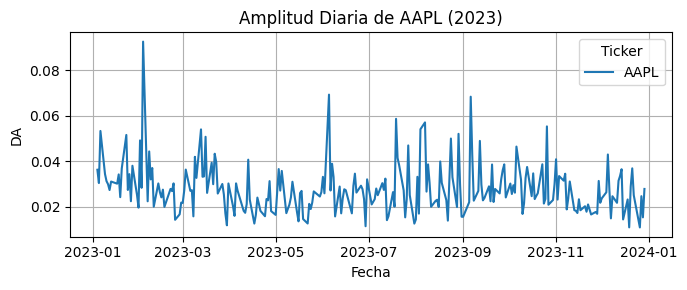

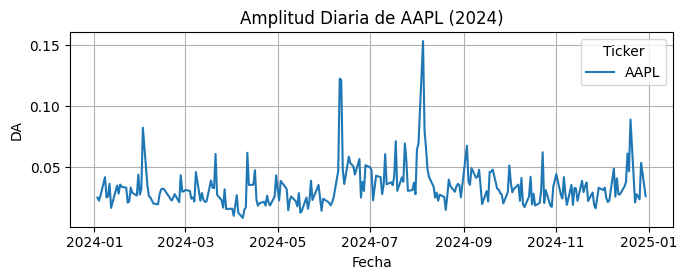

In [ ]:
import seaborn as sns

aapl_data_23 = stocks2023[stocks2023['Ticker'] == 'AAPL']

plt.figure(figsize=(7, 3))
sns.lineplot(data=aapl_data_23, x='Date', y='DA', hue='Ticker')
plt.title('Amplitud Diaria de AAPL (2023)')
plt.xlabel('Fecha')
plt.ylabel('DA')
plt.grid(True)
plt.tight_layout()
plt.show()

aapl_data_24 = stocks2024[stocks2024['Ticker'] == 'AAPL']

plt.figure(figsize=(7, 2.9))
sns.lineplot(data=aapl_data_24, x='Date', y='DA', hue='Ticker')
plt.title('Amplitud Diaria de AAPL (2024)')
plt.xlabel('Fecha')
plt.ylabel('DA')
plt.grid(True)
plt.tight_layout()
plt.show()

# Prueba ADF (Augmented Dickey–Fuller test)
Para comprobar si la serie de tiempo de la Amplitud diaria es estacionaria o no.
- Si la serie es l(0), la utilizamos para construir los enlaces de la red.
- Si la serie es l(1), aplicamos la primer diferencia y utilizamos esta para construir los enlaces en la red.

In [ ]:
import statsmodels.api as sm
import numpy as np

In [ ]:
#Test ADF para cada serie de cada acción por año

def run_adf_test(df, year):
    results = []
    for ticker, group in df.groupby('Ticker'):
        series = group['DA'].dropna()

        if len(series) > 0:
            try:
                adf_result = sm.tsa.stattools.adfuller(series)
                results.append({
                    'Ticker': ticker,
                    'D-F': round(adf_result[0],4),
                    'p-value': round(adf_result[1],4),
                    'Lags Used': adf_result[2],
                    'Number of Observations Used': adf_result[3]
                })
            except Exception as e:
                print(f'Error con {ticker} en {year}: {e}')
        else:
            print(f'Serie vacía para {ticker} en {year}')
    return results

adf_2023= pd.DataFrame(run_adf_test(stocks2023, 2023))
adf_2024= pd.DataFrame(run_adf_test(stocks2024, 2024))

adf_2023_l1 = pd.DataFrame(
    run_adf_test(
        stocks2023.assign(DA=stocks2023['DA'].diff()),
        2023
    )
)
adf_2024_l1 = pd.DataFrame(
    run_adf_test(
        stocks2024.assign(DA=stocks2024['DA'].diff()),
        2024
    )
)

In [ ]:
#Estacionarias en l(0) 2023:
adf_2023[adf_2023['p-value']<0.05].shape

(94, 5)

In [ ]:
#Estacionarias en l(1) 2023:
adf_2023_l1[adf_2023_l1['p-value']<0.05].shape

(94, 5)

In [ ]:
#Estacionarias en l(0) 2024:
adf_2024[adf_2024['p-value']<0.05].shape

(97, 5)

In [ ]:
#Estacionarias en l(1) 2024:
adf_2024_l1[adf_2024_l1['p-value']<0.05].shape

(97, 5)